Processing file: /home/shaghparast/Point_VAE/smlm-pc-vae/data/Sim_registered_2D/Localizations/file1.csv
First few x_coords: [  41.114   37.655 -120.38    42.235   39.461]
First few y_coords: [40.967 57.693  6.353 35.706 48.788]


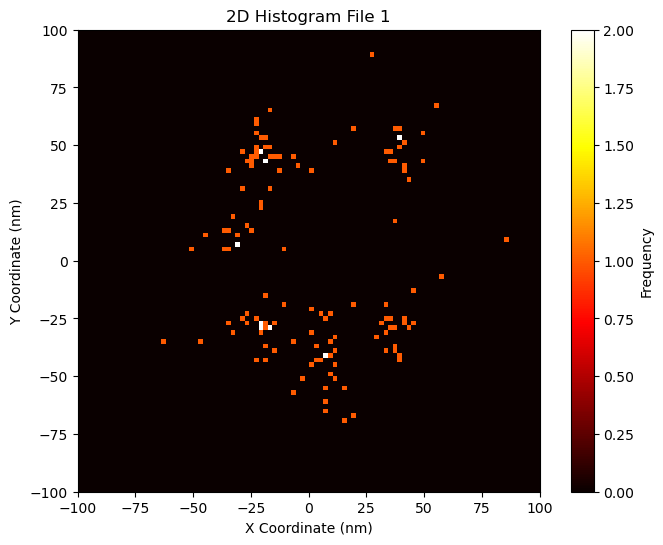

Processing file: /home/shaghparast/Point_VAE/smlm-pc-vae/data/Sim_registered_2D/Localizations/file2.csv
First few x_coords: [ 8.4767 36.375  26.199  51.141  35.53  ]
First few y_coords: [  2.2761 -13.248  -15.887  -24.956  -20.962 ]


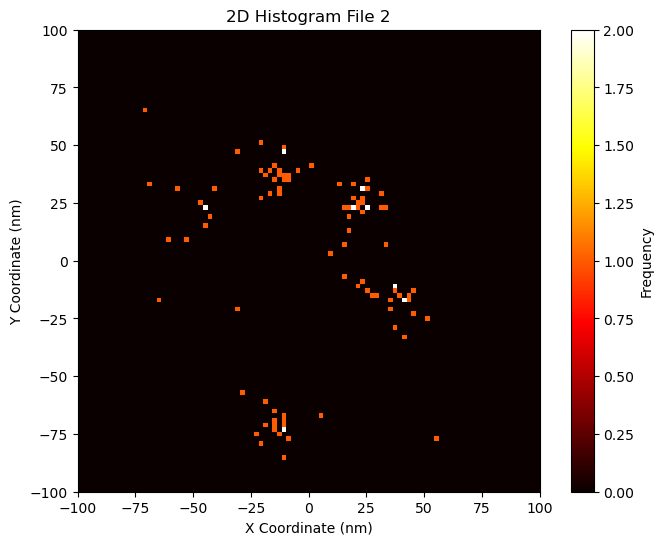

Processing file: /home/shaghparast/Point_VAE/smlm-pc-vae/data/Sim_registered_2D/Localizations/file3.csv
First few x_coords: [35.33  66.53  52.722 64.587 71.318]
First few y_coords: [55.376   8.7907 17.683  15.519   9.2839]


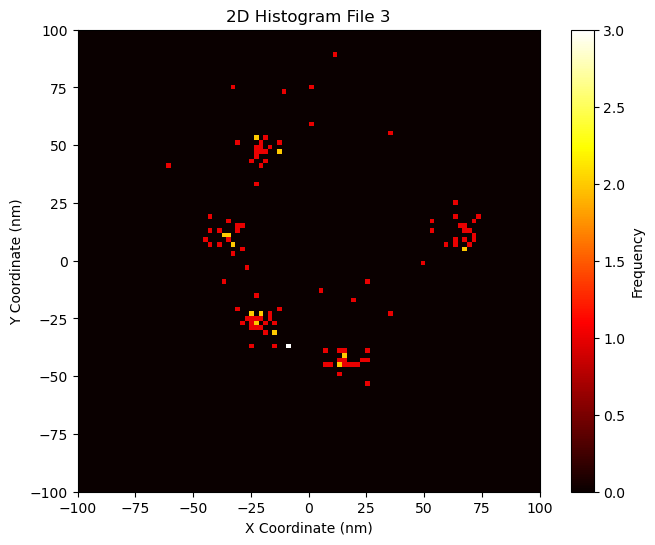

Processing file: /home/shaghparast/Point_VAE/smlm-pc-vae/data/Sim_registered_2D/Localizations/file4.csv
First few x_coords: [52.13  55.674 51.585 64.135 51.753]
First few y_coords: [ -5.796   -9.3143  -8.1632  16.503  -12.891 ]


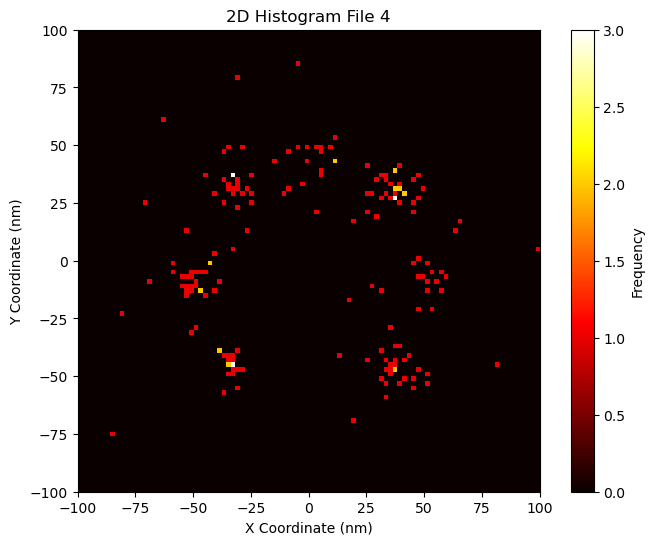

Processing file: /home/shaghparast/Point_VAE/smlm-pc-vae/data/Sim_registered_2D/Localizations/file5.csv
First few x_coords: [44.831 60.2   41.027 59.016 58.42 ]
First few y_coords: [ 7.431   8.5841 12.243  20.235   7.4497]


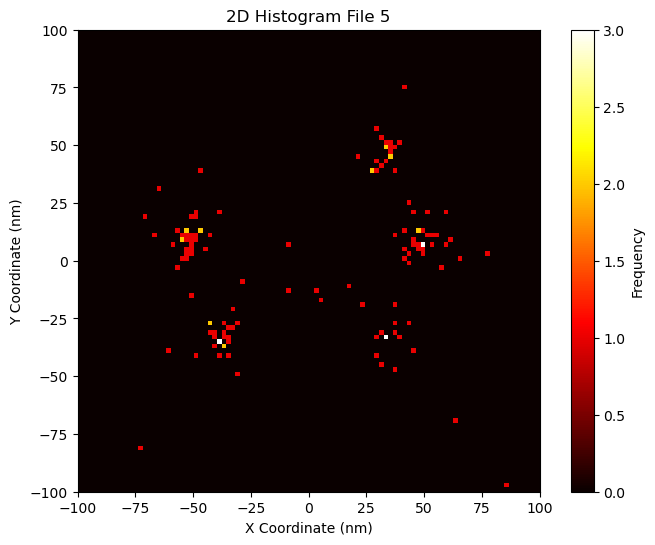

Processing file: /home/shaghparast/Point_VAE/smlm-pc-vae/data/Sim_registered_2D/Localizations/file6.csv
First few x_coords: [53.045 48.322 39.557 56.463 43.433]
First few y_coords: [-10.107     8.5611  -34.867     0.29481   2.0929 ]


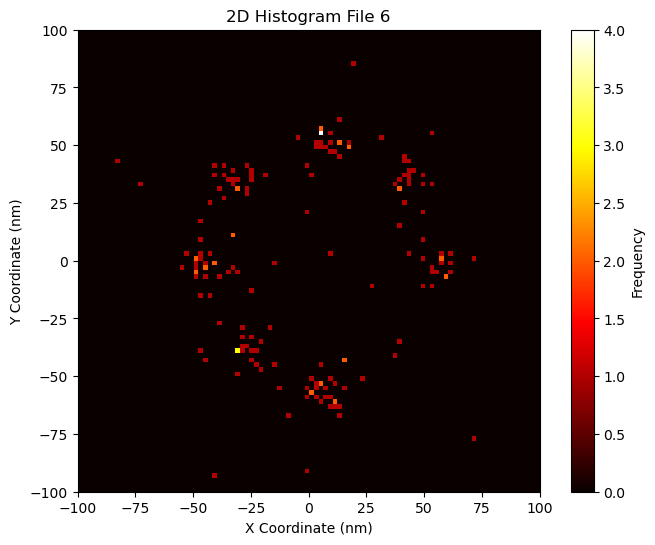

Processing file: /home/shaghparast/Point_VAE/smlm-pc-vae/data/Sim_registered_2D/Localizations/file7.csv
First few x_coords: [46.472 49.748 43.402 50.126 44.147]
First few y_coords: [-0.70553  1.724    5.7772  -6.7869   4.8927 ]


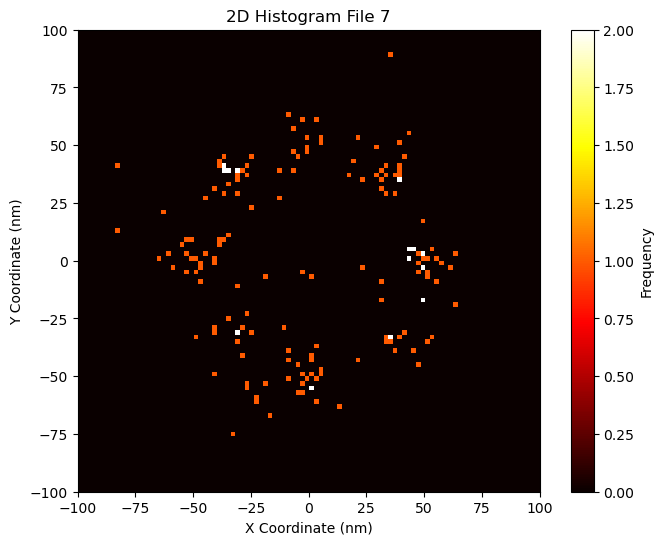

Processing file: /home/shaghparast/Point_VAE/smlm-pc-vae/data/Sim_registered_2D/Localizations/file8.csv
First few x_coords: [37.365 38.26  34.403 65.386 34.816]
First few y_coords: [22.87   42.334  38.731  -1.4005 42.286 ]


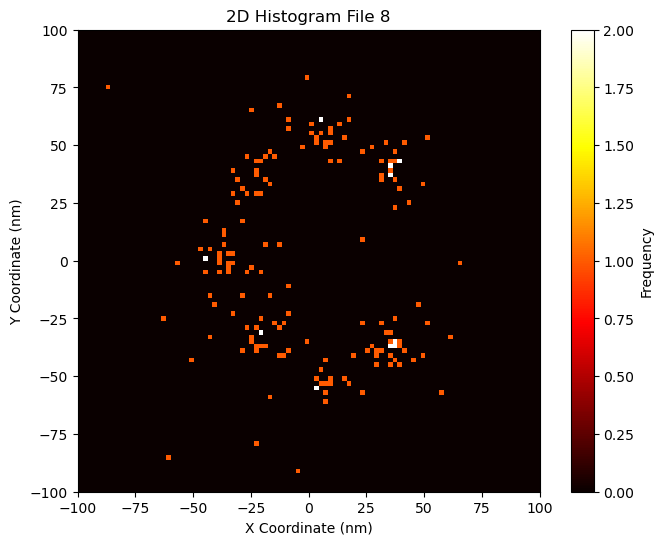

Processing file: /home/shaghparast/Point_VAE/smlm-pc-vae/data/Sim_registered_2D/Localizations/file9.csv
First few x_coords: [42.528 48.352 36.941 49.651 47.976]
First few y_coords: [ 6.7293 16.619   3.9036  4.6014  9.4444]


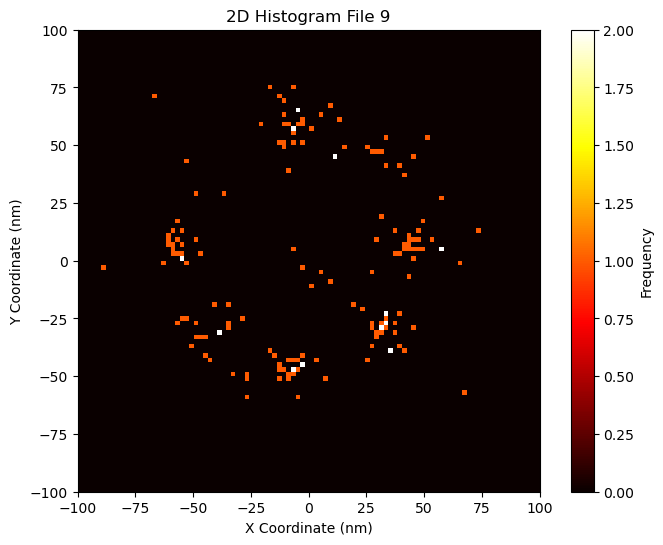

Processing file: /home/shaghparast/Point_VAE/smlm-pc-vae/data/Sim_registered_2D/Localizations/file10.csv
First few x_coords: [54.136 52.553 64.537 57.126 55.096]
First few y_coords: [ 3.7183   8.6593   3.0166   3.3025  -0.75241]


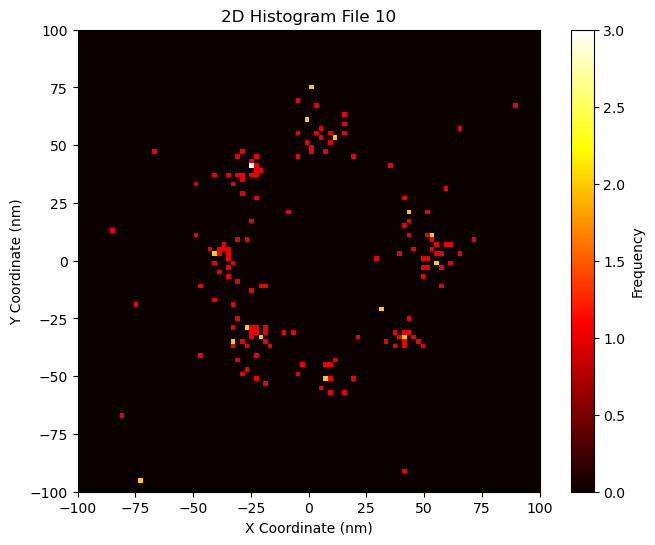

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_localization_histogram(x_coords, y_coords, bins=5, range_min=-100, range_max=100, cmap='hot', title_suffix=''):
    """
    Plots a 2D histogram from x and y coordinate data.

    Parameters:
    - x_coords: array-like, x coordinates
    - y_coords: array-like, y coordinates
    - bins: int, number of bins (default is 200)
    - range_min: float, minimum value of the range (default is -100)
    - range_max: float, maximum value of the range (default is 100)
    - cmap: str, colormap (default is 'hot')
    - title_suffix: str, suffix to add to the title (default is '')

    Returns:
    - None
    """
    # Compute the 2D histogram
    histogram, x_edges, y_edges = np.histogram2d(x_coords, y_coords, bins=bins, range=[[range_min, range_max], [range_min, range_max]])

    # Check for any issues with the histogram data
    if np.all(histogram == 0):
        print("Warning: Histogram contains all zeros. Check your data and bin ranges.")

    # Plot the histogram
    plt.figure(figsize=(8, 6))
    plt.imshow(histogram.T, origin='lower', cmap=cmap, extent=[range_min, range_max, range_min, range_max])
    plt.colorbar(label='Frequency')
    plt.xlabel('X Coordinate (nm)')
    plt.ylabel('Y Coordinate (nm)')
    plt.title(f'2D Histogram {title_suffix}')
    plt.show()

def process_files(file_list, bins=200, range_min=-100, range_max=100):
    """
    Processes multiple CSV files, reads x and y coordinates, and generates a 2D histogram for each file.

    Parameters:
    - file_list: list of str, paths to CSV files
    - bins: int, number of bins in the histogram
    - range_min: float, minimum value of the range
    - range_max: float, maximum value of the range

    Returns:
    - None
    """
    # Limit to the first 10 files
    file_list = file_list[:10]

    for idx, file_path in enumerate(file_list):
        try:
            # Read the CSV file
            data = pd.read_csv(file_path, header=None)
            x_coords = data.iloc[:, 0].values
            y_coords = data.iloc[:, 1].values

            # Check if the data is being read correctly
            print(f'Processing file: {file_path}')
            print(f'First few x_coords: {x_coords[:5]}')
            print(f'First few y_coords: {y_coords[:5]}')

            # Plot the histogram
            plot_localization_histogram(x_coords, y_coords, bins=bins, range_min=range_min, range_max=range_max, title_suffix=f'File {idx + 1}')
        
        except Exception as e:
            print(f'Error processing file {file_path}: {e}')

if __name__ == "__main__":
    # Define the directory and file pattern
    directory = '/home/shaghparast/Point_VAE/smlm-pc-vae/data/Sim_registered_2D/Localizations/'
    file_pattern = 'file'
    file_extension = '.csv'

    # List the first 10 files
    file_list = [os.path.join(directory, f'{file_pattern}{i}{file_extension}') for i in range(1, 11)]

    # Process the files (first 10)
    process_files(file_list, bins=100)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Processing file: /home/shaghparast/Point_VAE/smlm-pc-vae/data/Sim_registered_2D/Localizations/file1.csv
First few x_coords: [  41.114   37.655 -120.38    42.235   39.461]
First few y_coords: [40.967 57.693  6.353 35.706 48.788]
Bin size: 2.0000 nm
Processing file: /home/shaghparast/Point_VAE/smlm-pc-vae/data/Sim_registered_2D/Localizations/file2.csv
First few x_coords: [ 8.4767 36.375  26.199  51.141  35.53  ]
First few y_coords: [  2.2761 -13.248  -15.887  -24.956  -20.962 ]
Bin size: 2.0000 nm
Processing file: /home/shaghparast/Point_VAE/smlm-pc-vae/data/Sim_registered_2D/Localizations/file3.csv
First few x_coords: [35.33  66.53  52.722 64.587 71.318]
First few y_coords: [55.376   8.7907 17.683  15.519   9.2839]
Bin size: 2.0000 nm
Processing file: /home/shaghparast/Point_VAE/smlm-pc-vae/data/Sim_registered_2D/Localizations/file4.csv
First few x_coords: [52.13  55.674 51.585 64.135 51.753]
First few y_coords: [ -5.796   -9.3143  -8.1632  16.503  -12.891 ]
Bin size: 2.0000 nm
Processi

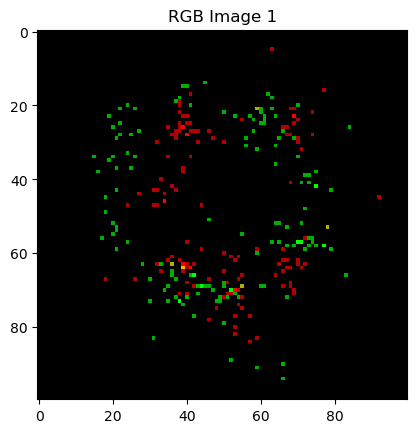

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


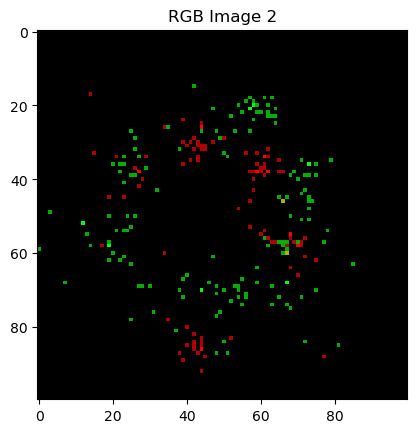

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


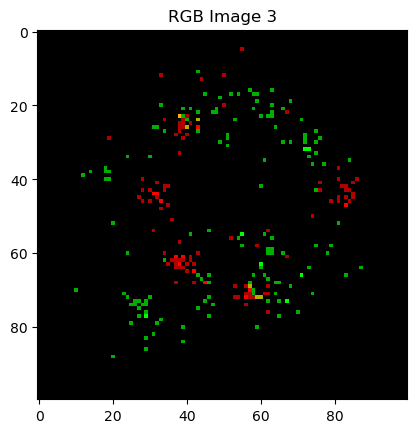

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


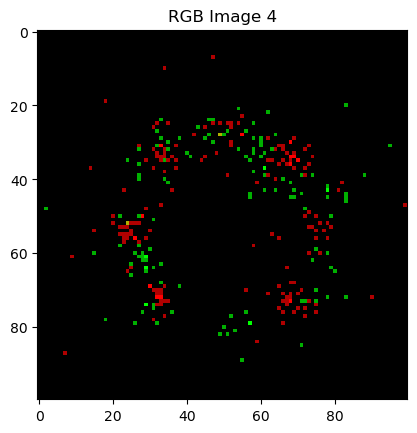

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


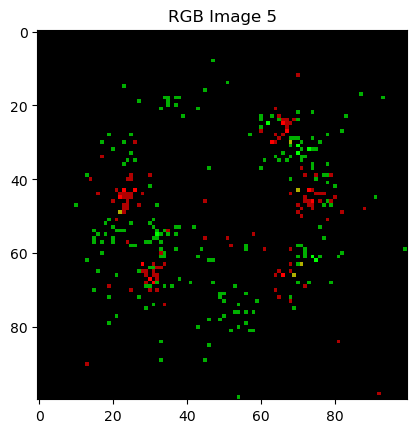

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


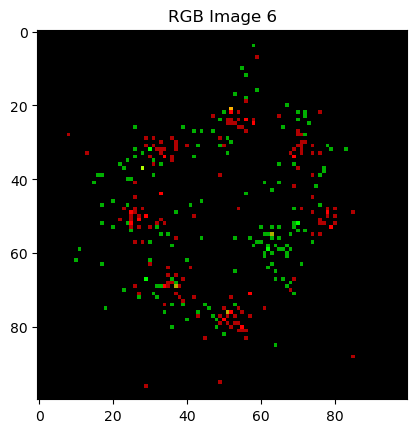

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


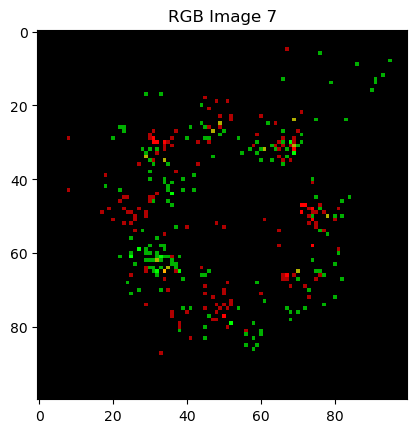

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


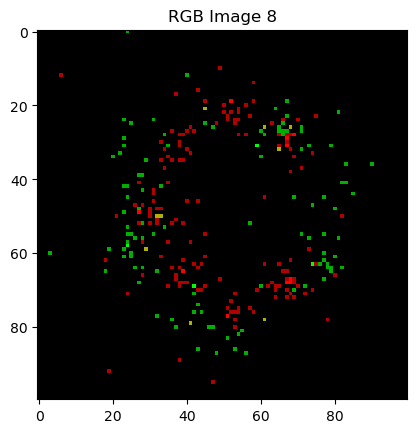

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


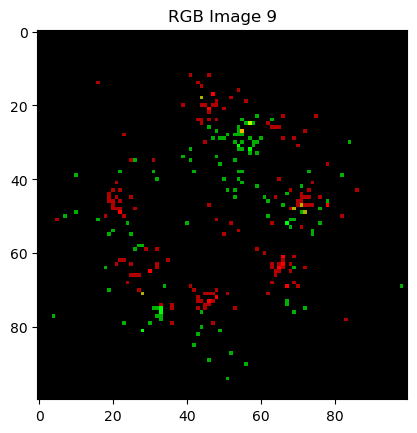

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


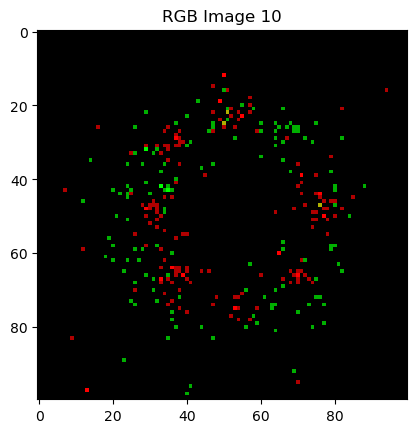

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_localization_histogram(x_coords, y_coords, bins=200, range_min=-100, range_max=100, cmap='hot', title_suffix=''):
    """
    Generates a 2D histogram from x and y coordinate data and returns it as an image array.

    Parameters:
    - x_coords: array-like, x coordinates
    - y_coords: array-like, y coordinates
    - bins: int, number of bins (default is 200)
    - range_min: float, minimum value of the range (default is -100)
    - range_max: float, maximum value of the range (default is 100)
    - cmap: str, colormap (default is 'hot')
    - title_suffix: str, suffix to add to the title (default is '')

    Returns:
    - histogram_image: 2D array, image of the histogram
    """
    # Compute the 2D histogram
    histogram, x_edges, y_edges = np.histogram2d(x_coords, y_coords, bins=bins, range=[[range_min, range_max], [range_min, range_max]])
    
    # Normalize histogram for better visualization
    histogram = np.log1p(histogram)  # Apply log scaling to handle large ranges of values

    # Calculate the bin size
    bin_size = (range_max - range_min) / bins
    print(f'Bin size: {bin_size:.4f} nm')

    # Plot the histogram
    histogram_image = np.flip(histogram.T, axis=0)  # Flip to match orientation
    return histogram_image

def process_files(file_list, bins=200, range_min=-100, range_max=100):
    """
    Processes multiple CSV files, reads x and y coordinates, and generates a 2D histogram for each file.

    Parameters:
    - file_list: list of str, paths to CSV files
    - bins: int, number of bins in the histogram
    - range_min: float, minimum value of the range
    - range_max: float, maximum value of the range

    Returns:
    - histograms: list of 2D arrays, histograms from each file
    """
    histograms = []

    # Limit to the first 10 files
    file_list = file_list[:10]

    for idx, file_path in enumerate(file_list):
        try:
            # Read the CSV file
            data = pd.read_csv(file_path, header=None)
            x_coords = data.iloc[:, 0].values
            y_coords = data.iloc[:, 1].values

            # Check if the data is being read correctly
            print(f'Processing file: {file_path}')
            print(f'First few x_coords: {x_coords[:5]}')
            print(f'First few y_coords: {y_coords[:5]}')

            # Generate the histogram image
            histogram_image = plot_localization_histogram(x_coords, y_coords, bins=bins, range_min=range_min, range_max=range_max, title_suffix=f'File {idx + 1}')
            histograms.append(histogram_image)
        
        except Exception as e:
            print(f'Error processing file {file_path}: {e}')

    return histograms

def create_rgb_image(exp1_histograms, exp2_histograms, bins=200, range_min=-100, range_max=100):
    """
    Creates RGB images by combining histograms from two experiments.

    Parameters:
    - exp1_histograms: list of 2D arrays, histograms from experiment 1 (red channel)
    - exp2_histograms: list of 2D arrays, histograms from experiment 2 (blue channel)
    - bins: int, number of bins in the histogram
    - range_min: float, minimum value of the range
    - range_max: float, maximum value of the range

    Returns:
    - None
    """
    for idx, (exp1_img, exp2_img) in enumerate(zip(exp1_histograms, exp2_histograms)):
        # Create an RGB image with histograms from exp1 in the red channel and exp2 in the blue channel
        rgb_image = np.zeros((bins, bins, 3), dtype=np.float32)
        rgb_image[:, :, 0] = exp1_img  # Red channel
        rgb_image[:, :, 1] = exp2_img  # Blue channel

        # Display the RGB image
        plt.imshow(rgb_image, interpolation='none')
        plt.title(f'RGB Image {idx + 1}')
        plt.show()

if __name__ == "__main__":
    # Define the directories and file patterns
    dir_exp1 = '/home/shaghparast/Point_VAE/smlm-pc-vae/data/Sim_registered_2D/Localizations/'
    dir_exp2 = '/home/shaghparast/Point_VAE/smlm-pc-vae/data/Exp_registered_2D/Localizations/'  # Update this path

    file_pattern = 'file'
    file_extension = '.csv'

    # List the first 10 files for both experiments
    file_list_exp1 = [os.path.join(dir_exp1, f'{file_pattern}{i}{file_extension}') for i in range(1, 11)]
    file_list_exp2 = [os.path.join(dir_exp2, f'{file_pattern}{i}{file_extension}') for i in range(1, 11)]

    # Process files for both experiments
    exp1_histograms = process_files(file_list_exp1, bins=100)
    exp2_histograms = process_files(file_list_exp2, bins=100)

    # Create and display RGB images
    create_rgb_image(exp1_histograms, exp2_histograms, bins=100)
